In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
cr_loan = pd.read_csv(r"C:\Users\Dell\Downloads\cr_loan2.csv")

In [3]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Cleaning

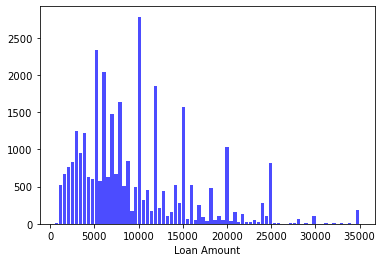

In [4]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

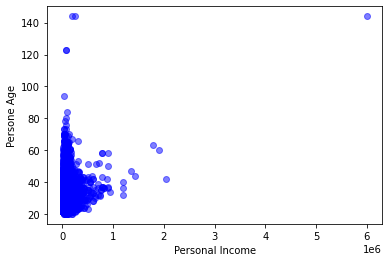

In [5]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [6]:
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [7]:
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [8]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


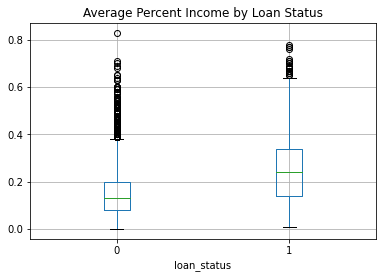

In [9]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [10]:
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [11]:
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='min'))

person_home_ownership  MORTGAGE  OTHER  OWN  RENT
loan_status                                      
0                           0.0    0.0  0.0   0.0
1                           0.0    0.0  0.0   0.0


In [43]:
# Create an array of indices where employment length is greater than 60

cr_loan_emp = cr_loan_clean

indices = cr_loan_clean[cr_loan_clean['person_emp_length'] > 60].index

In [20]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_clean = cr_loan_clean.drop(indices)

In [21]:
# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_clean['loan_status'],cr_loan_clean['person_home_ownership'],
            values=cr_loan_clean['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN  RENT
loan_status                                       
0                          38.0   24.0  31.0  41.0
1                          34.0   11.0  17.0  27.0


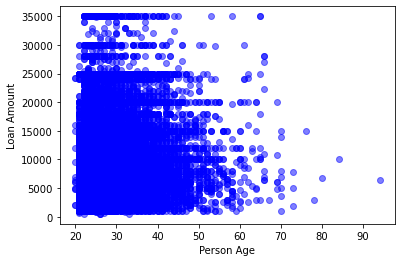

In [26]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_clean['person_age'], cr_loan_clean['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [28]:
cr_loan_clean = cr_loan_clean.drop(cr_loan_clean[cr_loan_clean['person_age'] > 100].index)

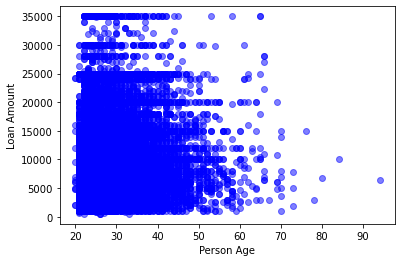

In [29]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan_clean['person_age'], cr_loan_clean['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [24]:
# Person Emp length is not fixed
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [30]:
print(pd.crosstab(cr_loan_clean['loan_status'],cr_loan_clean['person_home_ownership'],
            values=cr_loan_clean['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN  RENT
loan_status                                       
0                          38.0   24.0  31.0  41.0
1                          34.0   11.0  17.0  27.0


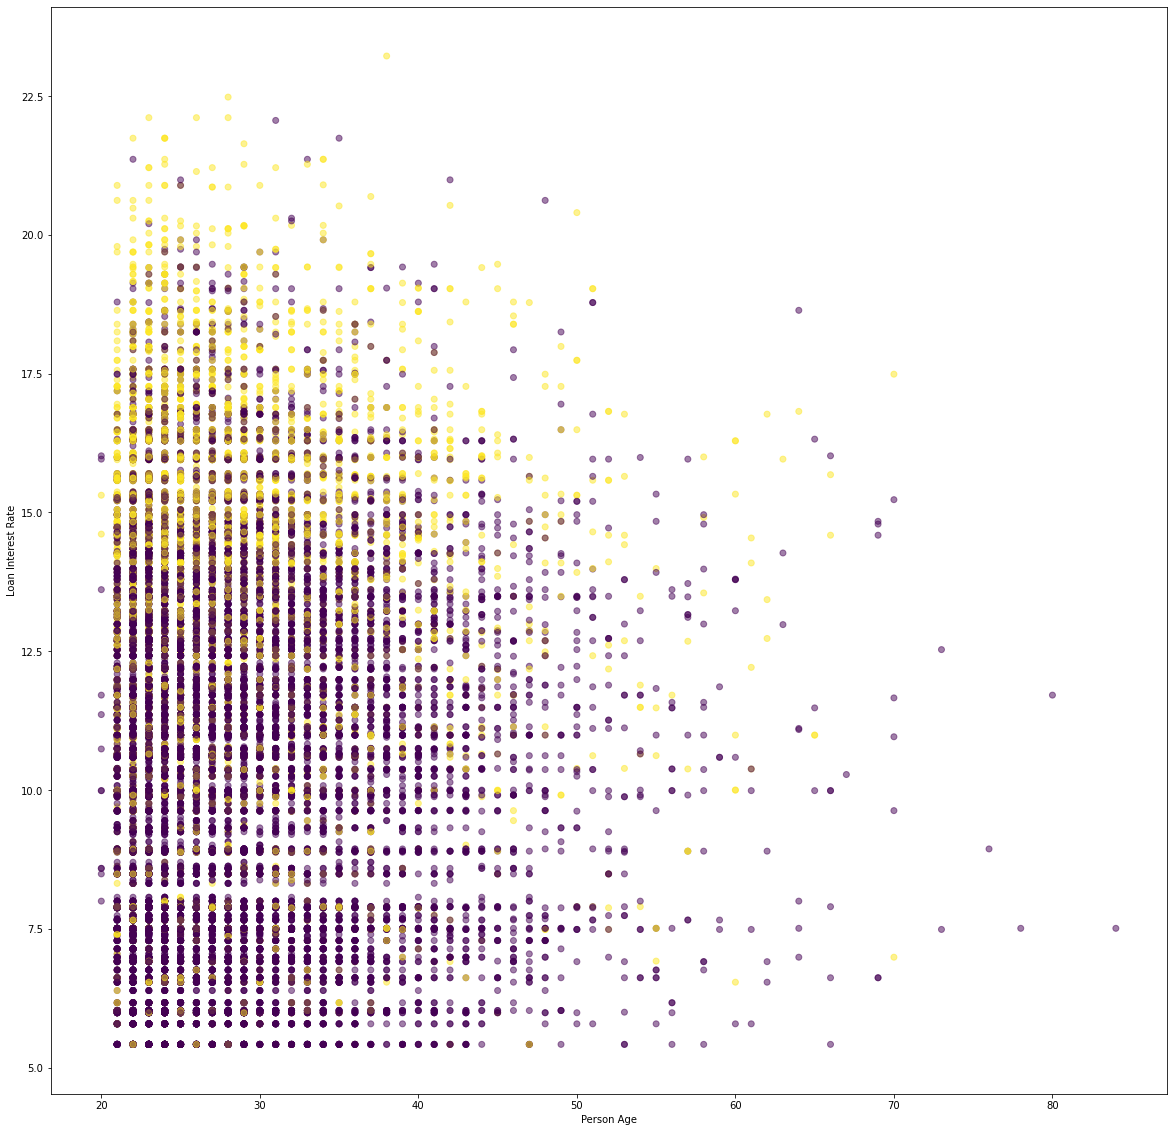

In [31]:
# Create a scatter plot of age and interest rate
plt.figure(figsize=(20,20))
plt.scatter(cr_loan_clean['person_age'], cr_loan_clean['loan_int_rate'],
            c = cr_loan_clean['loan_status'],
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

In [32]:
# Print a null value column array
print(cr_loan_clean.columns[cr_loan_clean.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [33]:
# Print the top five rows with nulls for employment length
print(cr_loan_clean[cr_loan_clean['person_emp_length'].isnull()].head())

     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
105        

In [35]:
# Impute the null values with the median value for all employment lengths
cr_loan_clean['person_emp_length'].fillna((cr_loan_clean['person_emp_length'].median()), inplace=True)

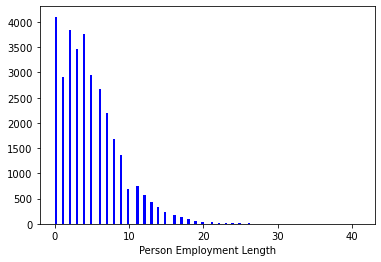

In [36]:
# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan_clean['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [37]:
# Print the number of nulls
print(cr_loan_clean['loan_int_rate'].isnull().sum())

3115


In [39]:
# Store the array on indices
indices = cr_loan_clean[cr_loan_clean['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan_clean.drop(indices)

In [41]:

cr_loan_clean.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


# EDA

<AxesSubplot:>

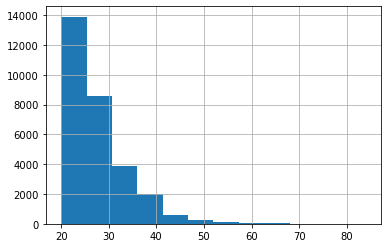

In [44]:
# Person Age
cr_loan_clean.person_age.hist(bins=12)

<AxesSubplot:>

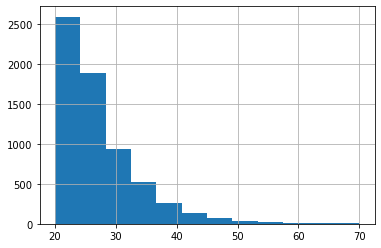

In [45]:
cr_loan_clean[cr_loan_clean['loan_status']==1].person_age.hist(bins=12)

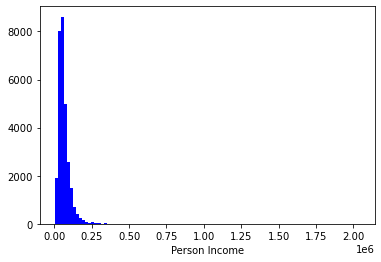

In [47]:
# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan_clean['person_income'], bins=100, color='blue')
plt.xlabel("Person Income")
plt.show()

In [48]:
import cufflinks as cf
cf.go_offline()

In [60]:
cr_loan_clean['person_income'].iplot(kind='box',bins=10,color='green')

In [61]:
# Person Home Ownership
print(cr_loan_clean['person_home_ownership'].value_counts())

RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64


In [62]:
# Loan Intent
print(cr_loan_clean['loan_intent'].value_counts())

EDUCATION            5852
MEDICAL              5451
VENTURE              5151
PERSONAL             5012
DEBTCONSOLIDATION    4703
HOMEIMPROVEMENT      3290
Name: loan_intent, dtype: int64


<AxesSubplot:>

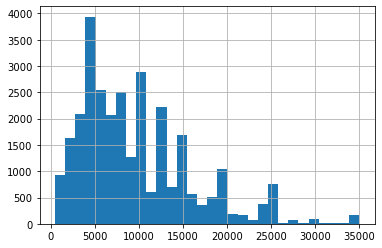

In [63]:
cr_loan_clean.loan_amnt.hist(bins=30)

In [64]:
cr_loan_clean['loan_amnt'].iplot(kind='box',bins=10,color='green')

In [65]:
cr_loan_clean['loan_amnt'].mode()

0    10000
dtype: int64

In [66]:
import statistics
statistics.mode(cr_loan_clean['loan_amnt'])

10000

In [67]:
# Checking Loan status Count
print(cr_loan_clean['loan_status'].value_counts())

0    22996
1     6463
Name: loan_status, dtype: int64


In [68]:
# Default Rate
print(cr_loan_clean['loan_status'].value_counts()[1]/cr_loan_clean['loan_status'].value_counts().sum())

0.21938966020570963


In [69]:
pd.pivot_table(cr_loan_clean,index=['loan_status','loan_intent'])

cb_person_cred_hist_length     loan_amnt  \
loan_status loan_intent                                                   
0           DEBTCONSOLIDATION                    5.687221   8968.275246   
            EDUCATION                            5.062797   9167.191696   
            HOMEIMPROVEMENT                      6.709518  10497.888340   
            MEDICAL                              5.959045   8538.373116   
            PERSONAL                             6.183612   9351.667499   
            VENTURE                              5.798086   9301.561076   
1           DEBTCONSOLIDATION                    5.774146  11130.609212   
            EDUCATION                            5.530168  10994.708210   
            HOMEIMPROVEMENT                      5.799537   9813.180765   
            MEDICAL                              5.784500  11188.273283   
            PERSONAL                             5.738355  10523.116947   
            VENTURE                              5.304063  11121.035387   

                               loan_int_rate  loan_percent_income  person_age  \
loan_status loan_intent                                                         
0           DEBTCONSOLIDATION      10.014987             0.144379   27.566875   
            EDUCATION              10.626478             0.151677   26.383598   
            HOMEIMPROVEMENT        10.597985             0.145505   29.537289   
            MEDICAL                10.194221             0.147925   28.045729   
            PERSONAL               10.590450             0.148401   28.354234   
            VENTURE                10.536119             0.151162   27.686645   
1           DEBTCONSOLIDATION      13.398217             0.237236   27.735513   
            EDUCATION              12.500435             0.258981   27.119683   
            HOMEIMPROVEMENT        12.897428             0.218424   27.750869   
            MEDICAL                13.403209             0.241482   27.670292   
            PERSONAL               12.609277             0.251348   27.382557   
            VENTURE                13.320917             0.281311   26.762779   

                               person_emp_length  person_income  
loan_status loan_intent                                          
0           DEBTCONSOLIDATION           4.803098   71628.957402  
            EDUCATION                   4.577980   67489.277215  
            HOMEIMPROVEMENT             5.551710   82235.684796  
            MEDICAL                     4.780905   65121.827136  
            PERSONAL                    5.132900   71519.801649  
            VENTURE                     5.074749   70243.029170  
1           DEBTCONSOLIDATION           4.650817   53707.257058  
            EDUCATION                   3.846686   47016.634026  
            HOMEIMPROVEMENT             3.765933   49698.148320  
            MEDICAL                     4.574439   50261.515976  
            PERSONAL                    3.745292   47437.699703  
            VENTURE                     3.496723   43950.832241

In [70]:
pd.pivot_table(cr_loan_clean,index=['loan_status','loan_intent'],values='loan_amnt')

loan_amnt
loan_status loan_intent                    
0           DEBTCONSOLIDATION   8968.275246
            EDUCATION           9167.191696
            HOMEIMPROVEMENT    10497.888340
            MEDICAL             8538.373116
            PERSONAL            9351.667499
            VENTURE             9301.561076
1           DEBTCONSOLIDATION  11130.609212
            EDUCATION          10994.708210
            HOMEIMPROVEMENT     9813.180765
            MEDICAL            11188.273283
            PERSONAL           10523.116947
            VENTURE            11121.035387

In [71]:
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status']))

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  3722  1490
EDUCATION          5342  1111
HOMEIMPROVEMENT    2664   941
MEDICAL            4450  1621
PERSONAL           4423  1098
VENTURE            4872   847


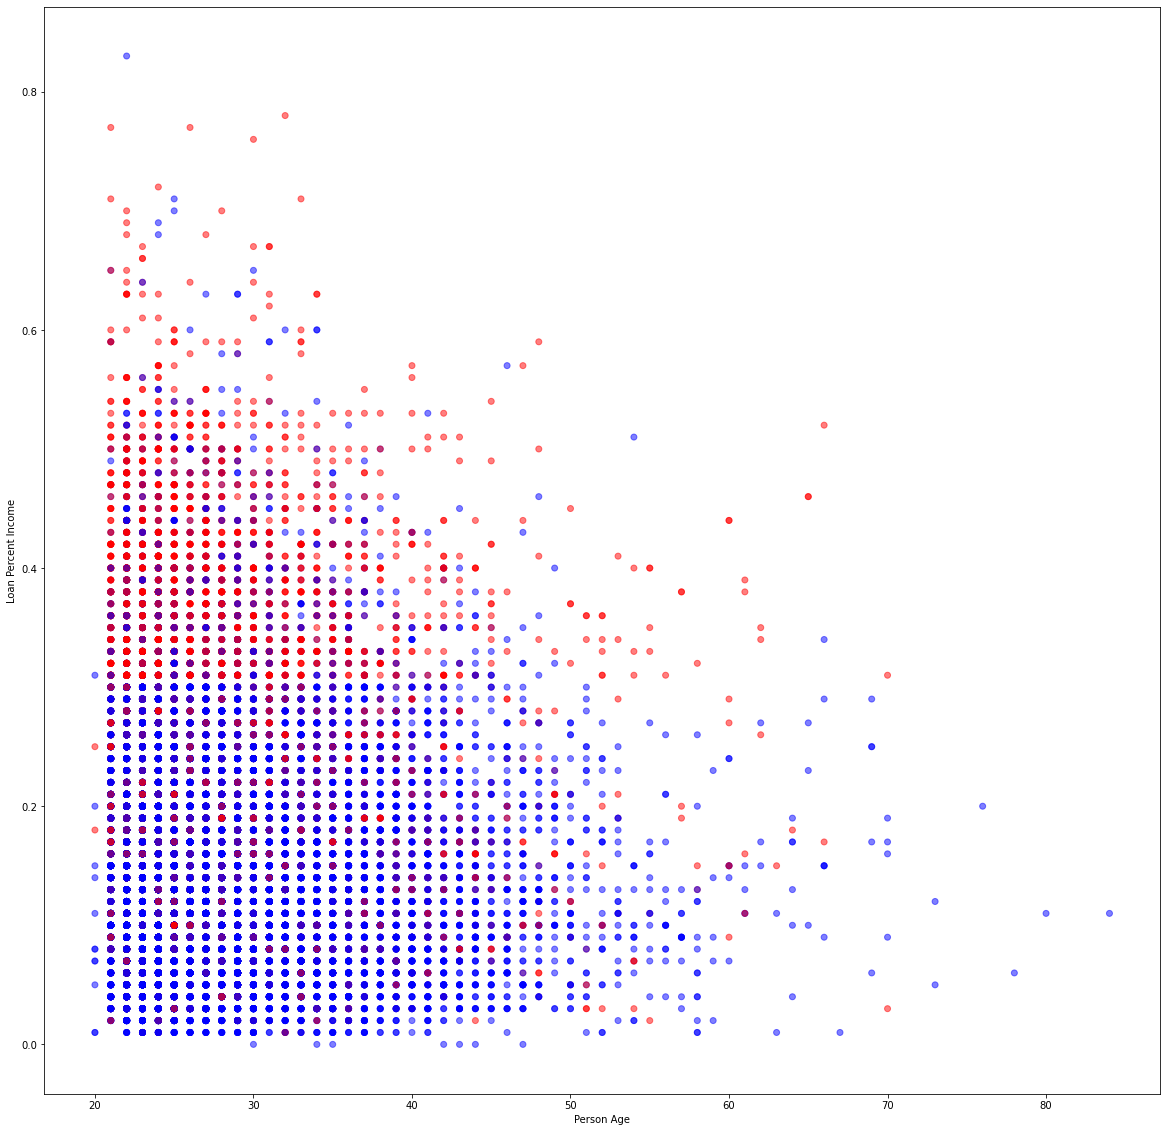

In [73]:
colors = ["blue","red"]
plt.figure(figsize=(20,20))
plt.scatter(cr_loan_clean['person_age'], cr_loan_clean['loan_percent_income'],
            c = cr_loan_clean['loan_status'],cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Percent Income")
plt.show()

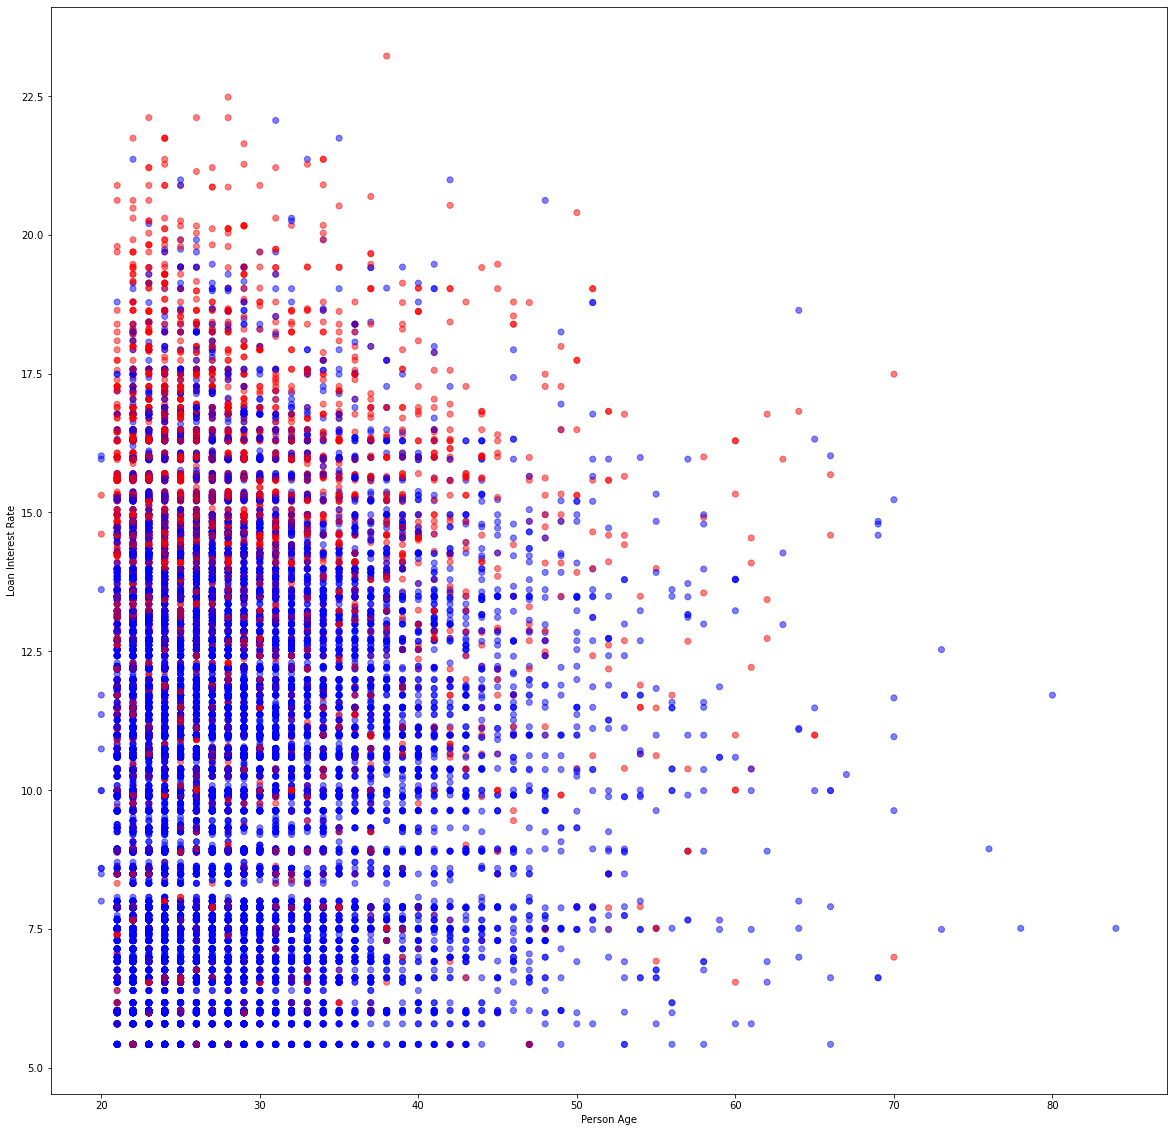

In [74]:
colors = ["blue","red"]
plt.figure(figsize=(20,20))
plt.scatter(cr_loan_clean['person_age'], cr_loan_clean['loan_int_rate'],
            c = cr_loan_clean['loan_status'],cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

EDA Findings
1. Most of the loans taken by 20-30 age group and defaults made accordingly.
2. Median salary is 55K
3. Median loan amount 8000
4. Default rate is 21.9%
5. No. of Loans made: Education, Medical, Venture...
6. Avg. Default amount by loan intent : Medical, DebtConolidation, Venture...
7. Default percentage high for DebtCons, Medical, HomeImprovement  
8. Default is highly likely when "Loan Percent Income" higher than 0.3 
8. Default is highly likely when interest rate is high

# Logistic Regression Model for Probability of default

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


# Example

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
# One-hot encoding credit data

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

In [164]:
# Create the X and y data sets
X = cr_loan_prep.drop('loan_status',axis=1)

y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [165]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))


In [166]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

print(preds)

[[0.5542214  0.4457786 ]
 [0.77655347 0.22344653]
 [0.71144174 0.28855826]
 ...
 [0.47755049 0.52244951]
 [0.6295219  0.3704781 ]
 [0.87621446 0.12378554]]


In [167]:
# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head(5)

print(preds_df)

   prob_default
0      0.445779
1      0.223447
2      0.288558
3      0.169358
4      0.114182


In [168]:
print(true_df)

       loan_status
31622            1
24935            1
15342            0
3460             0
16424            1


In [169]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.445779
1            1      0.223447
2            0      0.288558
3            0      0.169358
4            1      0.114182


In [170]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])


In [183]:
# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.275 else 0)

print(preds_df)


       prob_default  loan_status
0          0.445779            1
1          0.223447            0
2          0.288558            1
3          0.169358            0
4          0.114182            0
...             ...          ...
11779      0.079626            0
11780      0.051979            0
11781      0.522450            1
11782      0.370478            1
11783      0.123786            0

[11784 rows x 2 columns]


In [184]:
# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())


0    7353
1    4431
Name: loan_status, dtype: int64


# Credit model performance


In [185]:
from sklearn.metrics import classification_report

In [186]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'],target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.89      0.71      0.79      9198
     Default       0.39      0.68      0.50      2586

    accuracy                           0.70     11784
   macro avg       0.64      0.69      0.64     11784
weighted avg       0.78      0.70      0.72     11784



In [187]:
from sklearn.metrics import precision_recall_fscore_support

In [188]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.88603291, 0.39449334]), array([0.70830615, 0.67594741]), array([0.78726361, 0.49821861]), array([9198, 2586], dtype=int64))


In [189]:
# f1 Score
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[2])

[0.78726361 0.49821861]


# Visually scoring credit models


In [190]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


0.8025288526816021


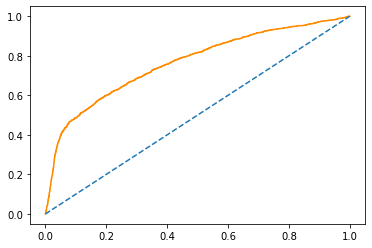

In [191]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test,y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

In [192]:
print(auc)

0.7643248801355148


# Model discrimination and impact

Thresholds and confusion matrices


In [193]:
from sklearn.metrics import confusion_matrix

In [194]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.275 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[6515 2683]
 [ 838 1748]]


# How thresholds affect performance


Setting the threshold to 0.4 shows promising results for model evaluation. Now you can assess the financial impact using the default recall which is selected from the classification reporting using the function precision_recall_fscore_support().

For this, you will estimate the amount of unexpected loss using the default recall to find what proportion of defaults you did not catch with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

The average loan value, avg_loan_amnt has been calculated and made available in the workspace along with preds_df and y_test.

In [195]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

avg_loan_amnt = 9583.600936895346


# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * num_defaults * (1 - default_recall))

9872265.223119883


All Values def_recalls, nondef_recalls, accs & ticks imported.(DC)

In [197]:
def_recalls = [0.7981438515081206,
 0.7583139984532096,
 0.7157772621809745,
 0.6759474091260634,
 0.6349574632637278,
 0.594354215003867,
 0.5467904098994586,
 0.5054137664346481,
 0.46403712296983757,
 0.39984532095901004,
 0.32211910286156226,
 0.2354988399071926,
 0.16782675947409126,
 0.1148491879350348,
 0.07733952049497293,
 0.05529775715390565,
 0.03750966744006187,
 0.026295436968290797,
 0.017788089713843776]

In [198]:
nondef_recalls = [0.5342465753424658,
 0.5973037616873234,
 0.6552511415525114,
 0.708306153511633,
 0.756468797564688,
 0.8052837573385518,
 0.8482278756251359,
 0.8864970645792564,
 0.9215046749293324,
 0.9492280930637095,
 0.9646662317895195,
 0.9733637747336378,
 0.9809741248097412,
 0.9857577734290063,
 0.9902152641878669,
 0.992280930637095,
 0.9948901935203305,
 0.9966297021091541,
 0.997499456403566]

In [199]:
accs = [0.5921588594704684,
 0.6326374745417516,
 0.6685336048879837,
 0.7012050237610319,
 0.7298031228784793,
 0.7589952477936185,
 0.7820773930753564,
 0.8028682959945689,
 0.8211133740665308,
 0.8286659877800407,
 0.8236591989137814,
 0.811439239646979,
 0.8025288526816021,
 0.7946367956551256,
 0.7898845892735913,
 0.7866598778004074,
 0.7847929395790902,
 0.7836897488119484,
 0.7825016972165648]

In [201]:
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]


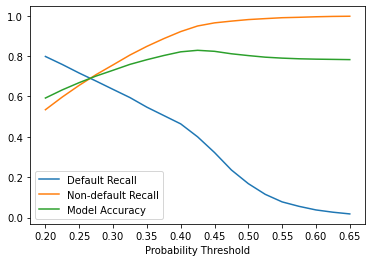

In [202]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()